<a href="https://colab.research.google.com/github/mshojaei77/LLMs-Journey/blob/main/ch1/Pre_trained_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pre-trained Embeddings with Hugging Face and Visualizing Embeddings

This Jupyter notebook demonstrates how to use pre-trained embeddings from Hugging Face, specifically the `jinaai/jina-embeddings-v2-small-en` model. We will also visualize the embeddings using dimensionality reduction techniques such as t-SNE and PCA.

## 1. Installing Required Libraries

First, let's install the necessary libraries. We'll use `transformers` from Hugging Face to load the pre-trained embeddings and `matplotlib` and `sklearn` for visualization and dimensionality reduction.


In [ ]:
!pip install -q transformers matplotlib scikit-learn


## 2. Loading Pre-trained Embeddings

We'll load the `jinaai/jina-embeddings-v2-small-en` model using the `transformers` library.



In [ ]:
from transformers import AutoTokenizer, AutoModel

# Load the tokenizer and model
model_name = "jinaai/jina-embeddings-v2-small-en"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


## 3. Preparing the Corpus

For demonstration purposes, we'll use a small corpus of sentences.



In [3]:
corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "Artificial intelligence is transforming the world.",
    "Machine learning models require large datasets.",
    "Natural language processing is a key area in AI.",
    "Deep learning has revolutionized computer vision."
]


## 4. Generating Embeddings

We'll tokenize the sentences and generate embeddings using the pre-trained model.



In [5]:
import torch

# Tokenize the sentences
inputs = tokenizer(corpus, padding=True, truncation=True, return_tensors="pt")

# Generate embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Extract the embeddings (using the [CLS] token embedding for sentence-level representation)
embeddings = outputs.last_hidden_state[:, 0, :].numpy()


## 5. Visualizing Embeddings using PCA

We'll use PCA to reduce the dimensionality of the embeddings to 2D for visualization.



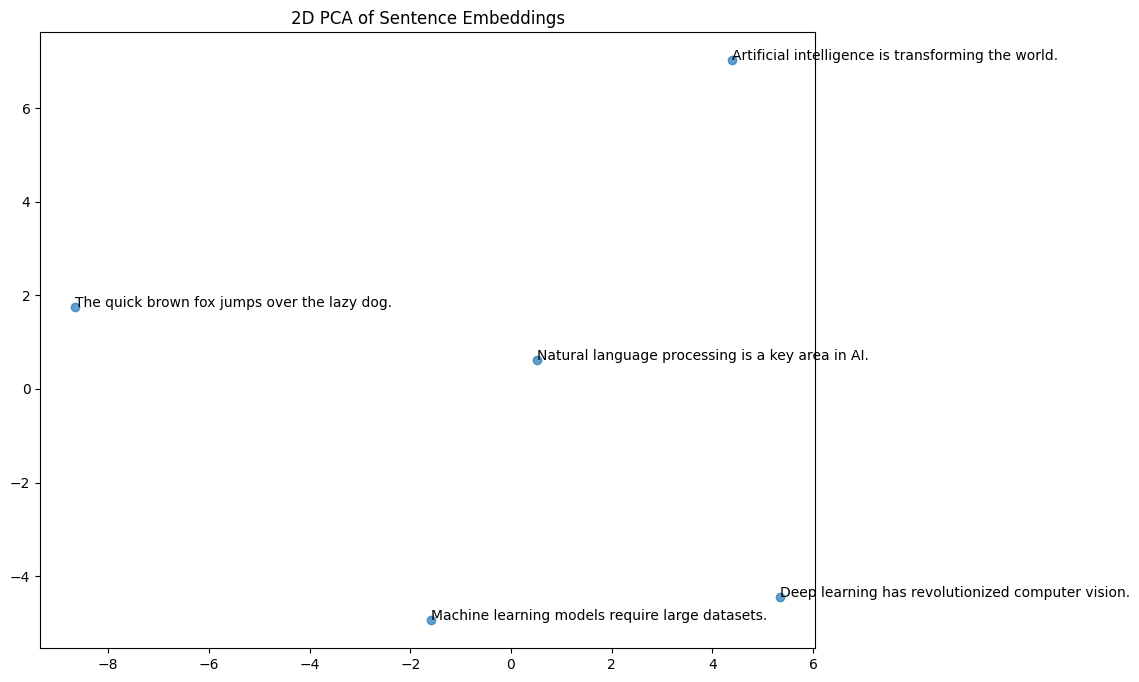

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
result_pca = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(result_pca[:, 0], result_pca[:, 1], alpha=0.7)

# Label the points
for i, sentence in enumerate(corpus):
    plt.annotate(sentence, xy=(result_pca[i, 0], result_pca[i, 1]))

plt.title('2D PCA of Sentence Embeddings')
plt.show()

## 6. Visualizing Embeddings using t-SNE

We'll use t-SNE to reduce the dimensionality of the embeddings to 2D for visualization.




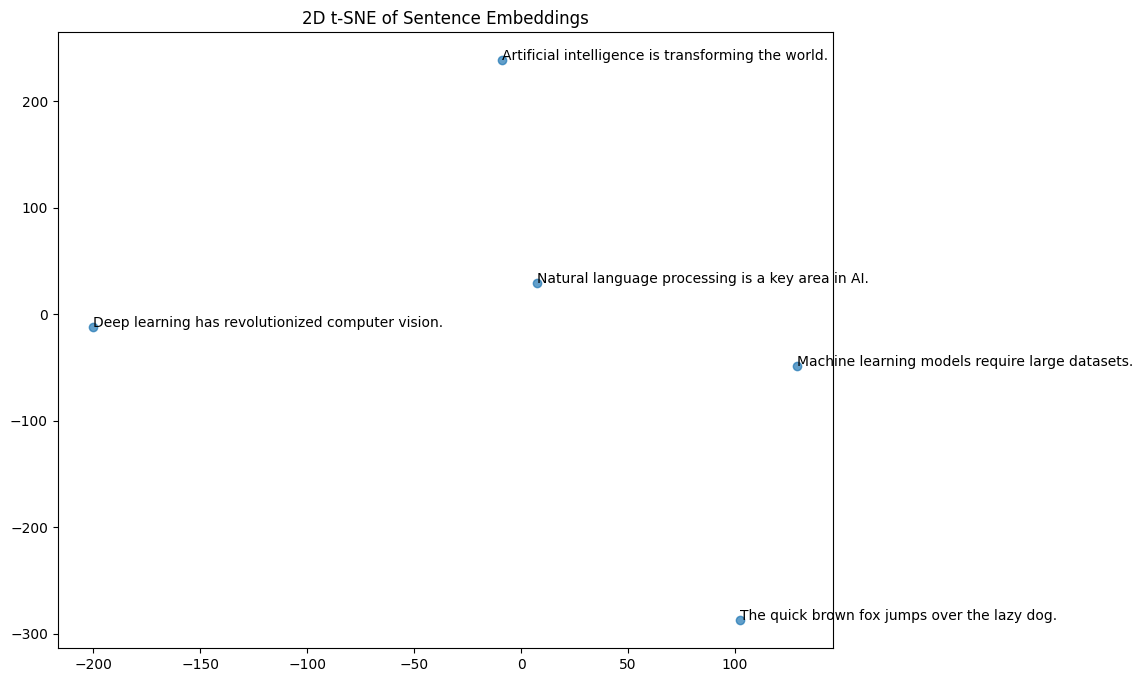

In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
result_tsne = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(result_tsne[:, 0], result_tsne[:, 1], alpha=0.7)

# Label the points
for i, sentence in enumerate(corpus):
    plt.annotate(sentence, xy=(result_tsne[i, 0], result_tsne[i, 1]))

plt.title('2D t-SNE of Sentence Embeddings')
plt.show()

## 7. Conclusion

In this notebook, we demonstrated how to use pre-trained embeddings from Hugging Face and visualize them using dimensionality reduction techniques such as PCA and t-SNE. This can help in understanding the semantic relationships between sentences in a corpus.

Feel free to experiment with different sentences and models to explore the embeddings further.